# Attention

<br>


[<img src="https://upload.wikimedia.org/wikipedia/commons/c/c8/Scout_Girl_in_Concentration.jpg" width="200" align="right" style="margin:15px 20px">](https://en.wikipedia.org/wiki/Attention) This little demo illustrates some of the concepts behind attention in transformers, using word embeddings. The goal is simply to show how the basic calculations underlying attention work, and how weighting embeddings with attention can add in words that are similar. As it is implemented in multiple Transformer layers, attention becomes more difficult to understand.





In [33]:
import numpy as np
import matplotlib.pyplot as plt
!pip install networkx
import networkx as nx
import gensim
import gensim.matutils as matutils
import gensim.downloader as gdl


In [34]:
embedding = gdl.load("glove-wiki-gigaword-100")
embedding.init_sims()

<ipython-input-34-8502c55cf211>:2: DeprecationWarning: Call to deprecated `init_sims` (Use fill_norms() instead. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  embedding.init_sims()


In [35]:
def most_similar(context, topn=10):
    dists = np.dot(embedding.vectors_norm, context)
    best = matutils.argsort(dists, topn=topn, reverse=True)
    return best

def attention(word, context, normalize=True, beta=1):
    ei =  embedding.get_vector(word, norm=True)
    attn = np.zeros(len(context))
    for j in np.arange(len(context)):
        ej = embedding.get_vector(context[j], norm=True)
        attn[j] = np.dot(ei,ej)

    attn = np.exp(beta*attn)/np.sum(np.exp(beta*attn))
    attn = np.round(np.round(attn, 3) / np.sum(np.round(attn, 3)), 3)

    return attn

In [36]:
def display_attention_weights(keys, query):
    sentence = keys
    output = query

    sentence = sentence.split()
    keys = ['%s ' % word for word in sentence]
    query = [' %s' % output]
    G = nx.Graph()
    G.add_nodes_from(keys, bipartite=0)
    G.add_nodes_from(query, bipartite=1)

    attn = attention(word=output, context=sentence, beta=5)

    for j in range(len(attn)):
        weight = np.round(attn[j], 3)
        G.add_edge('%s ' % sentence[j], ' %s' % output, weight=weight)

    pos = nx.bipartite_layout(G, keys)

    for j in range(len(keys)):
        pos[keys[j]][1] = -j

    for j in range(len(query)):
        pos[query[j]][1] = -j-len(keys)/2

    fig, ax = plt.subplots()
    fig.set_size_inches(6, 5)
    edge_labels = nx.get_edge_attributes(G, "weight")
    edges = G.edges()
    weights = [10*G[u][v]['weight'] for u,v in edges]
    nx.draw_networkx_edge_labels(G, pos, edge_labels)
    nx.draw(G, pos=pos, alpha=.75, width=weights)


    for word in keys:
        x, y = pos[word]
        plt.text(x, y, s="%s  " % word, horizontalalignment='right')

    for word in query:
        x, y = pos[word]
        plt.text(x, y, s="   %s" % word, horizontalalignment='left')



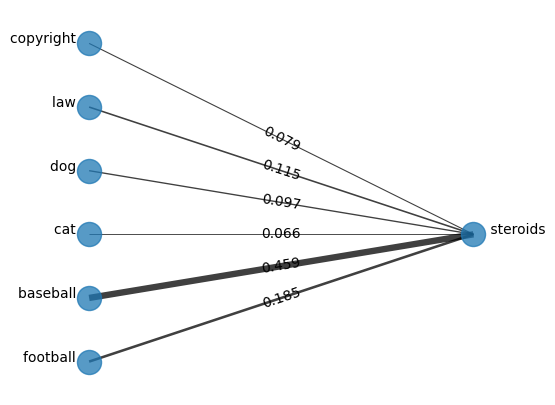

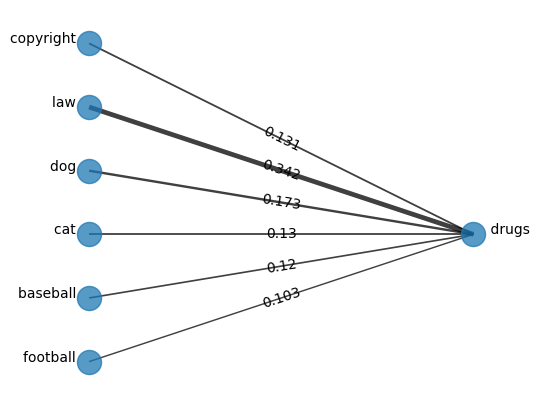

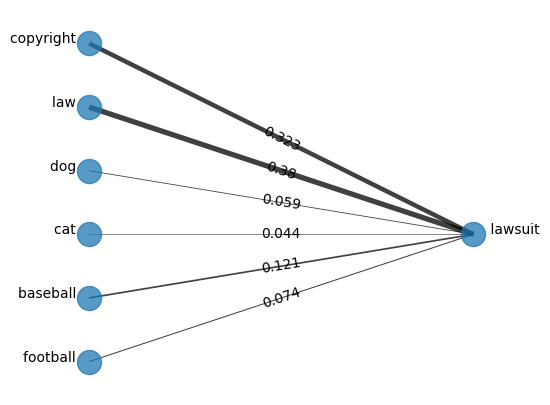

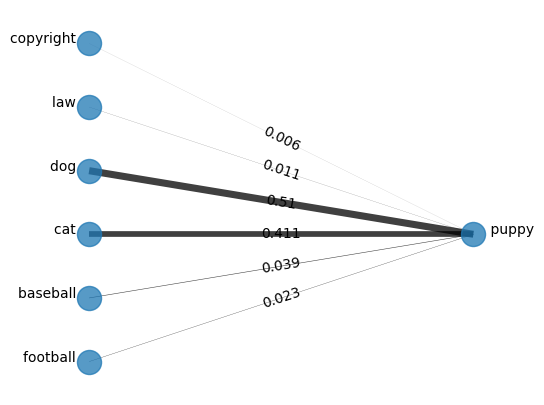

In [37]:
for q in ['steroids', 'drugs', 'lawsuit', 'puppy']:
    display_attention_weights(keys='copyright law dog cat baseball football', query=q)
